# <h2 style="text-align: center;"><span style="color: #003300;">Product Personalization and Recommendation System for ecommerce</span></h2>
<h3><span style="color: #003300;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; <span style="color: #000080;">&nbsp; By</span></span></h3>
<h3><span style="color: #000080;">&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; Steaphen antony Venansious&nbsp;</span></h3>



#  On Recommendation System for Beer Mart Online Beer Store Portal
# Steaphen antony Venansious
# Steve@techgeek.co.in

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [2]:
Beer_Data_Frame=pd.read_csv("beer_data.csv")
Beer_Data_Frame.shape

(475984, 3)

In [3]:
Beer_Data_Frame.head()


,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5



# Data_Preparing


In [4]:
Beer_Data_Frame.dropna() #dropping null values

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5
...,...,...,...
475979,48360,WesWes,4.5
475980,48360,Slatetank,4.0
475981,33061,asabreed,4.0
475982,33061,PopeDX,5.0


In [5]:
# Dropping Duplicates 
Beer_Data_Frame = Beer_Data_Frame.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

In [6]:
R_bid_counts = pd.DataFrame(Beer_Data_Frame.beer_beerid.value_counts(sort=True))
BRF=Beer_Data_Frame[["beer_beerid","review_overall"]]
URF=Beer_Data_Frame[["review_profilename","review_overall"]]

In [7]:
BR=BRF.groupby(['beer_beerid']).review_overall.size().reset_index()
UURF=URF.groupby(['review_profilename']).review_overall.size().reset_index()
UURF.describe()

,review_overall
count,22497.000000
mean,21.090012
std,65.394331
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,1842.000000


### After some tests I remove those beers whose ratings no is less then 50 in this N is 50

In [8]:
BR=BR[BR["review_overall"]>50]
bid_counts = pd.DataFrame(R_bid_counts[R_bid_counts<=50]).sum()
# UURF=UURF[UURF["review_overall"]>3]

In [9]:
SB=BR[["beer_beerid"]]


In [10]:
Select_Beers=BRF.loc[BRF['beer_beerid'].isin(SB["beer_beerid"])]
beers =Beer_Data_Frame.groupby('beer_beerid')['review_overall'].count().reset_index()
beers = beers.sort_values('review_overall', ascending=False)

beers_count_subset = beers[beers.review_overall >= 50]

In [11]:
Users_counts = pd.DataFrame(Beer_Data_Frame.review_profilename.value_counts(sort=True))
Users_counts.describe()

,review_profilename
count,22497.000000
mean,21.090012
std,65.394331
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,1842.000000


In [12]:
#it shows 75% users occurs less then 11 time after cut it down we check again
urs =Beer_Data_Frame.groupby('review_profilename')['review_overall'].count().reset_index()
urs_count_subset = urs[urs.review_overall >= 11]
urs_count_subset.describe()

,review_overall
count,5720.000000
mean,75.103322
std,113.545894
min,11.000000
25%,18.000000
50%,35.000000
75%,82.000000
max,1842.000000


In [13]:
urs_count_subset = urs[urs.review_overall >= 35] #so we again cut down 50% data
urs_count_subset = urs_count_subset.sort_values('review_overall', ascending=False)

urs_count_subset.head(5)


,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


In [14]:
Final_Beer_data = Beer_Data_Frame.merge(beers_count_subset,how='inner',on='beer_beerid')
#so new we merge these data to get final data
Final_Beer_data = Final_Beer_data.merge(urs_count_subset,how='inner',on='review_profilename')
#now we get the final data after rename the data
Final_Beer_data .rename(columns={'review_overall_x' : 'rating','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},
                  inplace = True)

print(Final_Beer_data)

        beer_beerid review_profilename  rating  beers_reviews  users_reviews
0               436              Brent     3.0            127            518
1             10784              Brent     4.0            119            518
2             16074              Brent     4.0            431            518
3             33644              Brent     4.0            261            518
4              1122              Brent     5.0             54            518
...             ...                ...     ...            ...            ...
223482          878          kmacphail     3.0             63             56
223483          724          kmacphail     3.5            104             56
223484         1826          kmacphail     5.0            113             56
223485          401          kmacphail     4.5             63             56
223486          875          kmacphail     4.5            199             56

[223487 rows x 5 columns]



# Data exploration

### Unique Values of ratings

In [15]:
Unique_ratings=Select_Beers["review_overall"].unique()
print("Unique_ratings:",sorted(Unique_ratings))


Unique_ratings: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


mean rating: 3.88
standard deviation: 0.6987
median rating: 4.0


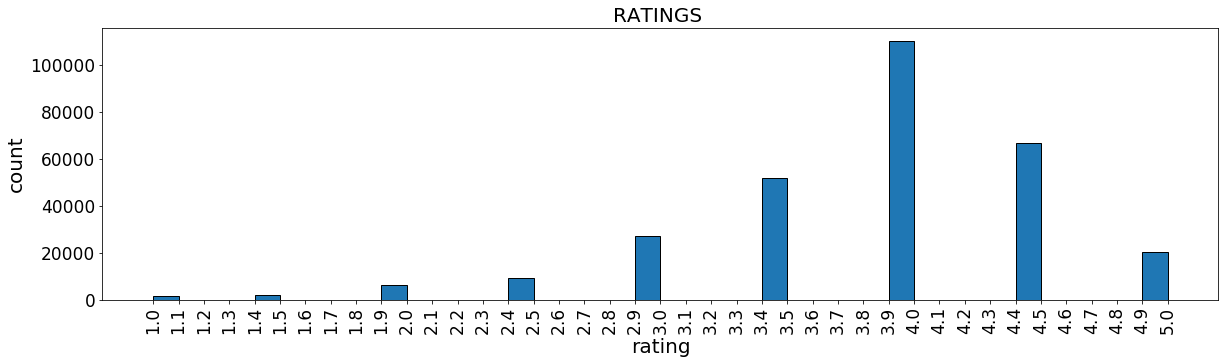

In [16]:
bins= np.arange(1,5.1,0.1)   # bins from 1 to 5, increments of 0.1
_= plt.figure(figsize=(20,5))
_= plt.hist(Select_Beers["review_overall"], bins=bins, edgecolor="k") #
_= plt.xticks(bins, rotation='vertical',size=17)
_= plt.yticks(size=17)
_= plt.title('RATINGS ', size=20)
_= plt.xlabel('rating', size=20)
_= plt.ylabel('count', size=20)

meanrating= Select_Beers.review_overall.mean()
print('mean rating: {:.2f}'.format(meanrating))
SDrating= Select_Beers.review_overall.std()
print('standard deviation: {:.4f}'.format(SDrating))
print('median rating:', Select_Beers.review_overall.median())

## Average  Ratings of beers 

In [17]:
Average_ratings_Beers=Select_Beers.groupby(['beer_beerid']).review_overall.mean().reset_index()
# Average_ratings_Beers
AVG_rating_of_bear=Select_Beers["review_overall"].mean()
AVG_rating_of_bear=Select_Beers[Select_Beers["review_overall"]==int(AVG_rating_of_bear)]
AVG_rating_of_bear#this Beers are average rated by customers

,beer_beerid,review_overall
12,436,3.0
108,10784,3.0
144,10784,3.0
157,10784,3.0
167,10784,3.0
...,...,...
475708,12172,3.0
475720,12172,3.0
475732,12172,3.0
475734,12172,3.0


### ploting the average ratings of 20 beers according to their id's

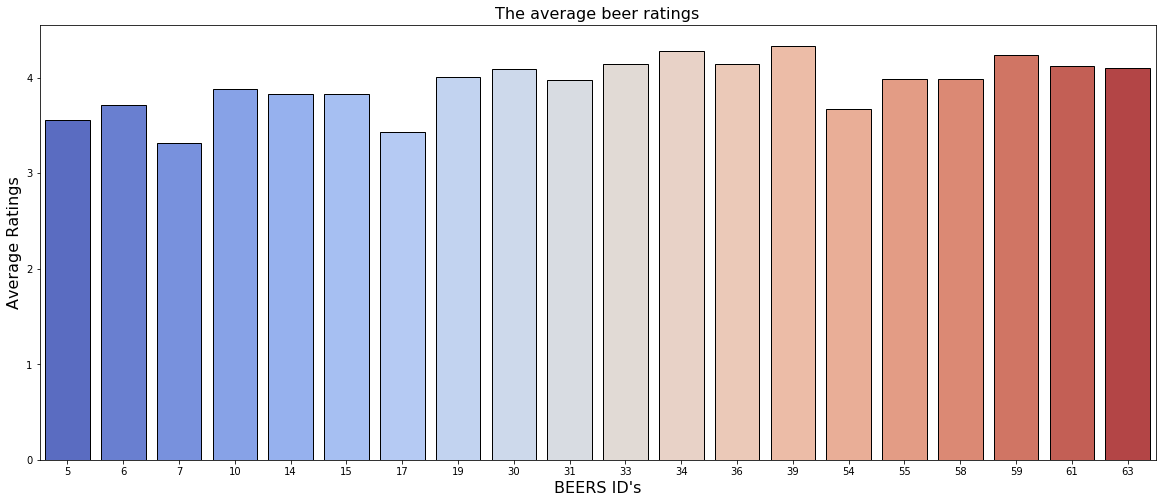

In [18]:

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.barplot(x='beer_beerid', y='review_overall', data=Average_ratings_Beers.head(20), ax=ax, palette="coolwarm", edgecolor="k")
plt.title("The average beer ratings", size=16)
plt.ylabel('Average Ratings', size=16)
plt.xlabel("BEERS ID's", size=16)
plt.show()

## Average Rating by users

In [19]:
Average_ratings_By_Users=URF.groupby(['review_profilename']).review_overall.mean().reset_index()
# Average_ratings_Beers
Average_ratings_By_User=URF["review_overall"].mean()
Average_ratings_By_User=URF[URF["review_overall"]==int(Average_ratings_By_User)]
Average_ratings_By_User#this Beers are average rated by customers

,review_profilename,review_overall
0,stcules,3.0
1,oline73,3.0
2,alpinebryant,3.0
12,Brent,3.0
49,Phelps,3.0
...,...,...
475890,Mebuzzard,3.0
475915,plaid75,3.0
475923,OliverTweek,3.0
475934,Deit39,3.0


### ploting the average ratings given by users according to their names

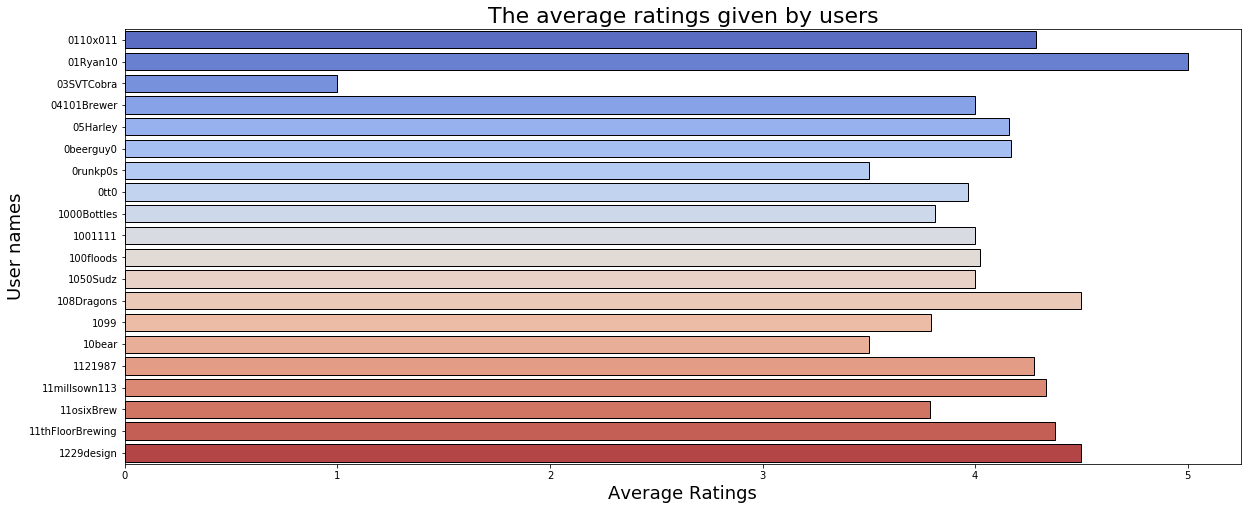

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
sns.barplot(x='review_overall', y='review_profilename', data=Average_ratings_By_Users.head(20), ax=ax, palette="coolwarm", edgecolor="k")
plt.title("The average ratings given by users", size=22)
plt.ylabel('User names', size=18)
plt.xlabel("Average Ratings", size=18)
plt.show()

# Recommendation Models

## Train Test split Train Data is 80% id of the cleaning data and Test is 20%

In [21]:
msk = np.random.rand(len(Final_Beer_data)) < 0.8 #Making mask to randomly get  80 % of full data 
train = Final_Beer_data[msk]
test = Final_Beer_data[~msk] #those data whose not in train are intialize to test

In [22]:
train.head()

,beer_beerid,review_profilename,rating,beers_reviews,users_reviews
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518
6,17538,Brent,4.0,332,518
7,48911,Brent,4.0,153,518


Copy train data will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction. copy test data will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [23]:
copy_train = train.copy()
copy_test = test.copy()
copy_train['rating'] = copy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
copy_test['rating'] = copy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [24]:
# The beers not rated by user is marked as 1 for prediction. 
copy_train_f = copy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(1)

# The beers not rated by user is marked as 0 for evaluation. 
copy_test_f =copy_test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [25]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).fillna(0)

In [26]:
 beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# User based model

### Generating Similarity matrix using correlation between user

In [27]:


# User Similarity Matrix
user_correlation = 1 - pairwise_distances(beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.04078322 0.04883165 ... 0.         0.07336928 0.        ]
 [0.04078322 1.         0.04433603 ... 0.02924938 0.06232949 0.        ]
 [0.04883165 0.04433603 1.         ... 0.         0.1007505  0.        ]
 ...
 [0.         0.02924938 0.         ... 1.         0.01969397 0.        ]
 [0.07336928 0.06232949 0.1007505  ... 0.01969397 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [28]:
FinalBearFeatures = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [29]:
#now using mean normalizing the feature data
mean = np.nanmean(FinalBearFeatures, axis=1)
norm_feature = (FinalBearFeatures.T-mean).T
# norm_feature.head()

In [30]:
# Final User Similarity Matrix after normalizing features data
UserCorrelation = 1 - pairwise_distances(norm_feature.fillna(0), metric='cosine')
UserCorrelation[np.isnan(UserCorrelation)] = 0
# print(UserCorrelation)

In [31]:
#we are not interested in those correlation which are less then 0 (neg values) so we are going to make it 0
UserCorrelation[UserCorrelation<0]=0
UserCorrelation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.0540335 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00176946,
        0.        ],
       [0.0540335 , 0.        , 0.        , ..., 0.00176946, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

# Prediction

In [32]:
UserPredictRatings = np.dot(UserCorrelation, FinalBearFeatures.fillna(0))
UserPredictRatings 

array([[ 1.05244649,  3.86974032,  2.57471682, ...,  1.48191476,
         2.90373484,  1.86385502],
       [ 2.97504722,  5.94827544,  4.764481  , ...,  2.9138252 ,
         6.67498901,  3.50932217],
       [ 1.10945609,  1.94237866,  1.41047784, ...,  0.39719006,
         1.46478617,  1.82608943],
       ...,
       [ 6.74809673, 10.70297832,  6.056189  , ...,  1.35651539,
         3.3504454 ,  2.47165556],
       [ 3.87352119,  8.74040833,  5.68804041, ...,  2.6007602 ,
         6.24626143,  3.47382097],
       [ 3.02779378,  5.2470639 ,  4.87903216, ...,  1.49242569,
         2.26169669,  2.81264609]])

In [33]:
#now getting the final rating
UFinalRating = np.multiply(UserPredictRatings ,copy_train_f)
UFinalRating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.052446,3.869740,2.574717,3.056742,0.510688,1.191044,3.326999,2.519340,10.571883,4.810143,...,5.627685,0.732403,0.456928,0.985635,1.415767,0.958950,0.463450,1.481915,2.903735,1.863855
05Harley,2.975047,5.948275,4.764481,6.107428,0.685374,1.527688,5.212630,3.048917,12.690607,5.776705,...,7.559471,1.579494,0.578809,2.039546,2.649661,1.091589,1.712282,2.913825,6.674989,3.509322
100floods,1.109456,1.942379,1.410478,2.872366,0.665944,0.365314,1.716912,1.026369,4.960686,3.107716,...,4.155237,1.179033,1.039443,0.556142,0.973508,0.739820,0.919231,0.397190,1.464786,1.826089
1759Girl,4.004273,8.102695,7.069531,7.220897,1.995116,1.981060,8.691729,6.355671,20.774348,14.383962,...,7.107451,2.088254,1.304757,2.272592,2.529593,1.446573,0.848439,1.374437,4.311790,2.377118
1fastz28,5.337736,0.000000,6.152599,0.000000,2.057284,2.928159,8.683572,5.882898,23.887984,13.851755,...,7.499776,2.517794,0.000000,1.828293,2.854959,1.987518,1.584905,2.181696,3.833239,4.261139


### Determine how similar the first ten users are with each other and visualize it

In [34]:
T10users = UFinalRating.iloc[:10,:10]
T10usersT =T10users.transpose()
T10usersT.corr(method ='pearson')


review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
review_profilename,,,,,,,,,,
0110x011,1.000000,0.963814,0.932145,0.966336,0.842978,0.897652,0.939571,0.932945,0.912999,0.866254
05Harley,0.963814,1.000000,0.951151,0.932552,0.740089,0.853774,0.907714,0.930234,0.891573,0.843471
100floods,0.932145,0.951151,1.000000,0.943311,0.743017,0.840921,0.947218,0.964840,0.917296,0.927815
1759Girl,0.966336,0.932552,0.943311,1.000000,0.872649,0.944462,0.984774,0.962546,0.965944,0.937170
1fastz28,0.842978,0.740089,0.743017,0.872649,1.000000,0.783335,0.811052,0.740804,0.752007,0.754066
32hoss32,0.897652,0.853774,0.840921,0.944462,0.783335,1.000000,0.949958,0.926919,0.959321,0.892012
3Vandoo,0.939571,0.907714,0.947218,0.984774,0.811052,0.949958,1.000000,0.974662,0.979734,0.968387
4000qtrap,0.932945,0.930234,0.964840,0.962546,0.740804,0.926919,0.974662,1.000000,0.982738,0.957282
4DAloveofSTOUT,0.912999,0.891573,0.917296,0.965944,0.752007,0.959321,0.979734,0.982738,1.000000,0.947620


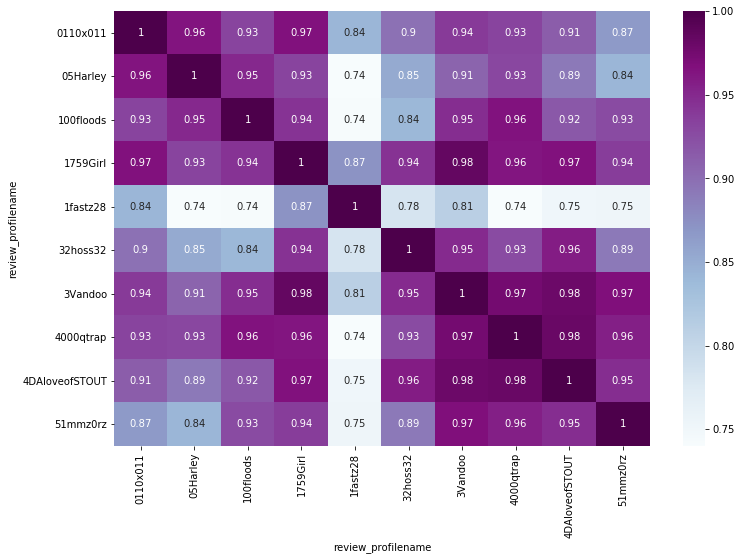

In [35]:
plt.figure(figsize=(12,8))#Similarities between users
sns.heatmap(T10users.T.corr(method ='pearson'),annot=True,cmap='BuPu')
plt.show()

# now same as it is we make item based model 

In [36]:
BeerFeatures = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T

mean = np.nanmean(BeerFeatures , axis=1)
NormF = (BeerFeatures.T-mean).T

# Item Similarity Matrix
ItemCorrelation = 1 - pairwise_distances(NormF.fillna(0), metric='cosine')
ItemCorrelation[np.isnan(ItemCorrelation)] = 0
ItemCorrelation[ItemCorrelation<0]=0
ItemPredictedRatings = np.dot((BeerFeatures.fillna(0).T),ItemCorrelation)
ItemPredictedRatings = np.multiply(ItemPredictedRatings,copy_train_f)
Top10Beer = ItemPredictedRatings.iloc[:10,:10]
Top10Beer.corr(method ='pearson')


beer_beerid,5,6,7,10,14,15,17,19,30,31
beer_beerid,,,,,,,,,,
5,1.000000,-0.836243,0.858589,-0.393477,0.678867,0.540301,0.899817,0.815278,0.675653,0.925351
6,-0.836243,1.000000,-0.855812,0.464088,-0.382197,-0.450710,-0.764749,-0.567562,-0.510845,-0.656390
7,0.858589,-0.855812,1.000000,-0.612575,0.698666,0.691718,0.835291,0.680461,0.787534,0.823416
10,-0.393477,0.464088,-0.612575,1.000000,-0.195440,-0.181340,-0.208132,-0.105913,-0.522038,-0.367378
14,0.678867,-0.382197,0.698666,-0.195440,1.000000,0.677574,0.744895,0.848084,0.713488,0.745518
15,0.540301,-0.450710,0.691718,-0.181340,0.677574,1.000000,0.687388,0.698335,0.612832,0.565931
17,0.899817,-0.764749,0.835291,-0.208132,0.744895,0.687388,1.000000,0.852213,0.752526,0.908202
19,0.815278,-0.567562,0.680461,-0.105913,0.848084,0.698335,0.852213,1.000000,0.655098,0.763394
30,0.675653,-0.510845,0.787534,-0.522038,0.713488,0.612832,0.752526,0.655098,1.000000,0.765087


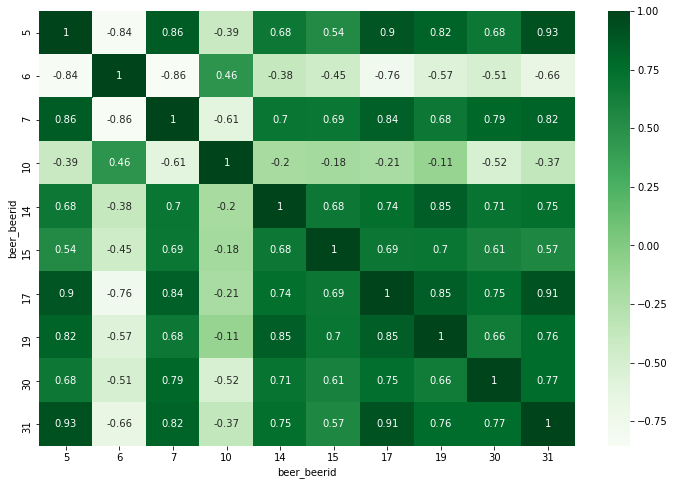

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(Top10Beer.corr(),annot=True,cmap='Greens')
plt.show()

# Now I am going toward Evaluation

### Finding Root Mean Square Error for user similarity  model using test data

In [38]:
TestBeerFeatures = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
mean = np.nanmean(TestBeerFeatures, axis=1)
TestNorm = (TestBeerFeatures.T-mean).T

# User Similarity Matrix
TestUserCorrelation = 1 - pairwise_distances(TestNorm.fillna(0), metric='cosine')
TestUserCorrelation[np.isnan(TestUserCorrelation)] = 0

In [39]:
TestUserCorrelation[TestUserCorrelation<0]=0
TUPredictedRatings = np.dot(TestUserCorrelation, TestBeerFeatures.fillna(0))
TUPredictedRatings

array([[0.        , 0.        , 0.04083444, ..., 0.03894624, 0.        ,
        0.        ],
       [0.        , 0.07315429, 0.        , ..., 0.12280679, 0.60937338,
        0.09769776],
       [0.        , 0.15307971, 0.        , ..., 0.        , 0.        ,
        0.18679141],
       ...,
       [0.10753529, 0.52664293, 0.91001067, ..., 0.33066139, 0.06910374,
        1.10731602],
       [0.04469353, 1.01982198, 0.02601351, ..., 0.13864003, 0.11903744,
        0.49230769],
       [0.321292  , 0.51487422, 0.50824496, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
TUFinalRatings = np.multiply(TUPredictedRatings,copy_test_f)
TUFinalRatings.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:


X  = TUFinalRatings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))



MinMaxScaler(copy=True, feature_range=(1, 5))


In [42]:
TempTest = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)

In [43]:
# Finding total non-NaN value
total_NN = np.count_nonzero(~np.isnan(y))
total_NN

44858

 now find root mean squared error which model have less RMSE is best

In [44]:
rmse = (np.sum(np.sum((TempTest - y )**2))/total_NN)**0.5
print("Root Mean Square Error(User model):",rmse)

Root Mean Square Error(User model): 1.8238605808869843


### Finding Root Mean Square Error for item similarity  model using test data

In [45]:
TestBeerFeatures = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
).T
mean = np.nanmean(TestBeerFeatures, axis=1)
TestNorm = (TestBeerFeatures.T-mean).T

# User Similarity Matrix
TestItemCorrelation = 1 - pairwise_distances(TestNorm.fillna(0), metric='cosine')
TestItemCorrelation[np.isnan(TestItemCorrelation)] = 0
TestItemCorrelation[TestItemCorrelation<0]=0
TIPredictedRatings =( np.dot(TestItemCorrelation, TestBeerFeatures.fillna(0))).T
TIFinalRatings = np.multiply(TIPredictedRatings,copy_test_f)
TIFinalRatings.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:

X  = TIFinalRatings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)


MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [47]:
TempTest = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='rating'
)
# Finding total non-NaN value
total_NN = np.count_nonzero(~np.isnan(y))

rmse = (np.sum(np.sum((TempTest - y )**2))/total_NN)**0.5
print("Root Mean Square Error(item model):",rmse)

Root Mean Square Error(item model): 2.117278369942631


Root Mean Square Error for user similarity is 1.81 and for Item based similarity is 2.09, So User Based model is Better for deployement.

### Best model was perfectly deployed recommend beers to the users.

# Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [48]:
RecommendedBeersCokes = pd.DataFrame(UFinalRating[UFinalRating.index=='cokes']).T
Recommended5BeersCokes=RecommendedBeersCokes.sort_values(by='cokes',ascending=False)[0:5]
# Recommended5BeersCokes.describe()
Recommended5BeersCokes

# REcommendedBeersCokes[REcommendedBeersCokes["review_profilename"]]

review_profilename,cokes
beer_beerid,
412,45.161773
92,42.271216
4083,39.731778
34,38.484580
1093,38.374335


In [49]:
RecommendedBeerGenog = pd.DataFrame(UFinalRating[UFinalRating.index=='genog']).T
Recommended5BeerGenog=RecommendedBeerGenog.sort_values(by='genog',ascending=False)[0:5]
Recommended5BeerGenog

review_profilename,genog
beer_beerid,
1093,45.828297
2093,45.000901
412,41.786762
131,40.023419
1708,38.344777


In [50]:
RecommendedBeerGiblet = pd.DataFrame(UFinalRating[UFinalRating.index=='giblet']).T
Recommended5BeerGiblet=RecommendedBeerGiblet.sort_values(by='giblet',ascending=False)[0:5]
Recommended5BeerGiblet

review_profilename,giblet
beer_beerid,
412,50.917792
2093,48.110222
104,44.442925
1904,43.333985
1093,43.120260


We sees BeerID 412 is recommended to these three users if three are friends we recommend this beers to them as this Beer will be their most desired by them

# Assignment - Recommendation Systems Submitted by Steaphen Antony Venansious
